In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
# File manipulation
import os
import shutil
# plotting
import matplotlib.pyplot as plt
# Time
import time
import pickle

In [2]:
# Load data
df_train = pd.read_csv('../data/processed/normalized_train.csv')
df_test = pd.read_csv('../data/processed/normalized_test.csv')
df_under_train = pd.read_csv('../data/processed/undersampled_train.csv')
df_under_test = pd.read_csv('../data/processed/undersampled_test.csv')

In [3]:
# Load model
filename = '../models/best_model.sav'

with open(filename,'rb') as f:
    model = pickle.load(f)

In [4]:
# Model evaluation
from sklearn.metrics import classification_report
# On test data
predict_test = model.predict(df_test["Data"])
y_score = model.predict_proba(df_test["Data"])

# classification report for optimal parameters (test set)
print("\nClassification report for optimal parameters (test data)\n")
print(classification_report(df_test["Label"], predict_test))


Classification report for optimal parameters (test data)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       840
           1       0.86      0.92      0.89       353
           2       0.98      0.95      0.96       785
           3       0.64      0.74      0.69       376

    accuracy                           0.86      2354
   macro avg       0.83      0.85      0.84      2354
weighted avg       0.86      0.86      0.86      2354



In [5]:
# Model ROC AUC
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(df_under_train['Label'])
y_onehot_test = label_binarizer.transform(df_test['Label'])
y_onehot_test.shape  # (n_samples, n_classes)

(2354, 4)

In [6]:
class_of_interest = 3
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

3

In [7]:
# predict_test.ravel()

array([0, 0, 0, ..., 3, 3, 2], dtype=int64)

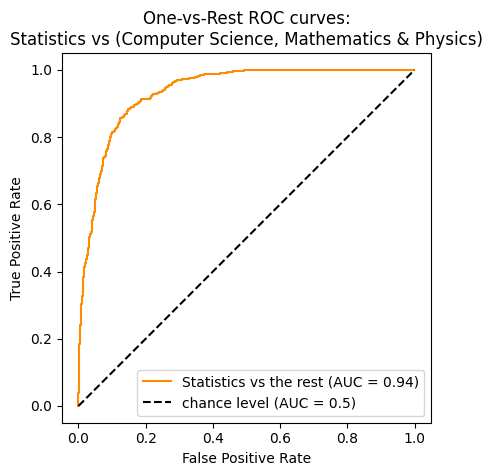

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score[:, class_id],
    name=f"Statistics vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nStatistics vs (Computer Science, Mathematics & Physics)")
plt.legend()
plt.show()

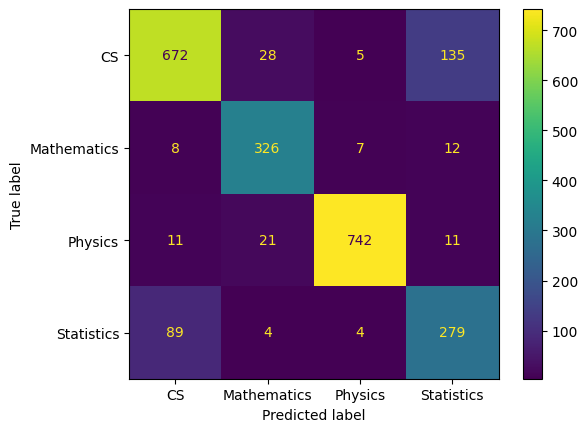

In [14]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# multilabel_confusion_matrix(df_test['Label'], predict_test)
cm = confusion_matrix(df_test['Label'], predict_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["CS", "Mathematics", "Physics", "Statistics"])
disp.plot()
plt.show()